<a href="https://colab.research.google.com/github/Gitcot/Gitcot/blob/main/Projet_analyse_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyse** de la population mondiale de 1980 a **2023**

Telechargement de la donnee


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scipy
!pip install sklearn





  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [70]:
import pandas as pd

In [71]:
import pandas as pd
df = pd.read_csv('/content/population_mondiale.csv', sep=';')  # '/content/' est le dossier par défaut
print(df.head())
print(df.info())
print(df.isnull().sum())



  country_code                           name_en   name_fr  \
0          BEL                           Belgium  Belgique   
1          BOL  Bolivia (Plurinational State of)   Bolivie   
2          COM                           Comoros   Comores   
3          CHE                       Switzerland    Suisse   
4          GHA                             Ghana     Ghana   

               borders  arab_world  central_europe_and_the_baltics  \
0      FRA,DEU,LUX,NLD       False                           False   
1  ARG,BRA,CHL,PRY,PER       False                           False   
2          MDG,MOZ,TZA        True                           False   
3  AUT,FRA,ITA,LIE,DEU       False                           False   
4          BFA,CIV,TGO       False                           False   

   east_asia_pacific  euro_area  europe_central_asia  european_union  ...  \
0              False       True                 True            True  ...   
1              False      False                False

remplacer les valeur manquantes de la colonne frontiere par no border

In [72]:
df['borders'] = df['borders'].fillna("No Borders")

ajouter une colonne pour voir si la frontiere existe ou pas

In [73]:
df['has_borders'] = df['borders'].notna().astype(int)  # 1 = a des frontières, 0 = non

In [74]:
print(df.head())
print(df.isnull().sum())


  country_code                           name_en   name_fr  \
0          BEL                           Belgium  Belgique   
1          BOL  Bolivia (Plurinational State of)   Bolivie   
2          COM                           Comoros   Comores   
3          CHE                       Switzerland    Suisse   
4          GHA                             Ghana     Ghana   

               borders  arab_world  central_europe_and_the_baltics  \
0      FRA,DEU,LUX,NLD       False                           False   
1  ARG,BRA,CHL,PRY,PER       False                           False   
2          MDG,MOZ,TZA        True                           False   
3  AUT,FRA,ITA,LIE,DEU       False                           False   
4          BFA,CIV,TGO       False                           False   

   east_asia_pacific  euro_area  europe_central_asia  european_union  ...  \
0              False       True                 True            True  ...   
1              False      False                False

In [75]:
# Nettoyage (exemples)
df.drop_duplicates(inplace=True)
df.head(100)


,country_code,name_en,name_fr,borders,arab_world,central_europe_and_the_baltics,east_asia_pacific,euro_area,europe_central_asia,european_union,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,has_borders
0,BEL,Belgium,Belgique,"FRA,DEU,LUX,NLD",False,False,False,True,True,True,...,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11538604.0,11586195.0,11685814.0,11822592.0,1
1,BOL,Bolivia (Plurinational State of),Bolivie,"ARG,BRA,CHL,PRY,PER",False,False,False,False,False,False,...,11090085.0,11263015.0,11435533.0,11606905.0,11777315.0,11936162.0,12079472.0,12224110.0,12388571.0,1
2,COM,Comoros,Comores,"MDG,MOZ,TZA",True,False,False,False,False,False,...,730216.0,746232.0,761664.0,776313.0,790986.0,806166.0,821625.0,836774.0,852075.0,1
3,CHE,Switzerland,Suisse,"AUT,FRA,ITA,LIE,DEU",False,False,False,False,True,True,...,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8638167.0,8704546.0,8775760.0,8849852.0,1
4,GHA,Ghana,Ghana,"BFA,CIV,TGO",False,False,False,False,False,False,...,28870939.0,29554303.0,30222262.0,30870641.0,31522290.0,32180401.0,32833031.0,33475870.0,34121985.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LVA,Latvia,Lettonie,"BLR,EST,LTU,RUS",False,True,False,True,True,True,...,1977527.0,1959537.0,1942248.0,1927174.0,1913822.0,1900449.0,1884490.0,1879383.0,1881750.0,1
96,SSD,South Sudan,Soudan du Sud,"CAF,COD,ETH,KEN,SDN,UGA",False,False,False,False,False,False,...,11194299.0,11066105.0,10658226.0,10395329.0,10447666.0,10606227.0,10748272.0,10913164.0,11088796.0,1
97,TTO,Trinidad and Tobago,Trinité et Tobago,No Borders,False,False,False,False,False,False,...,1460177.0,1469330.0,1478607.0,1504709.0,1519955.0,1518147.0,1525663.0,1531044.0,1534937.0,1
98,ALB,Albania,Albanie,"MNE,GRC,MKD,KOS",False,False,False,False,True,False,...,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0,1


visualisation des valeurs manquantes

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
# Remplacer les valeurs manquantes dans 'idh_group' par 'Unknown'
df['idh_group'] = df['idh_group'].fillna('Unknown')

# Remplacer les valeurs manquantes dans les colonnes d'année par la moyenne de chaque colonne
year_columns = [str(year) for year in range(1960, 2024)]
for year in year_columns:
    if year in df.columns:
        df[year] = df[year].fillna(df[year].mean())

print("Valeurs manquantes après traitement :")
print(df.isnull().sum().sum()) # Afficher le nombre total de valeurs manquantes restantes

Valeurs manquantes après traitement :
0


exportation des donnees traites

 Exporter le DataFrame avec les valeurs manquantes traitées

In [83]:
df.to_csv('population_mondiale_clean.csv', encoding='utf-8-sig', sep=';', index=False)
print("Données traitées exportées vers 'population_mondiale_clean.csv'")

Données traitées exportées vers 'population_mondiale_clean.csv'


In [84]:
df_test = pd.read_csv('population_mondiale_clean.csv', encoding='utf-8-sig' , sep=';')
print(df_test.head())

  country_code                           name_en   name_fr  \
0          BEL                           Belgium  Belgique   
1          BOL  Bolivia (Plurinational State of)   Bolivie   
2          COM                           Comoros   Comores   
3          CHE                       Switzerland    Suisse   
4          GHA                             Ghana     Ghana   

               borders  arab_world  central_europe_and_the_baltics  \
0      FRA,DEU,LUX,NLD       False                           False   
1  ARG,BRA,CHL,PRY,PER       False                           False   
2          MDG,MOZ,TZA        True                           False   
3  AUT,FRA,ITA,LIE,DEU       False                           False   
4          BFA,CIV,TGO       False                           False   

   east_asia_pacific  euro_area  europe_central_asia  european_union  ...  \
0              False       True                 True            True  ...   
1              False      False                False

In [78]:
print(df.head())

  country_code                           name_en   name_fr  \
0          BEL                           Belgium  Belgique   
1          BOL  Bolivia (Plurinational State of)   Bolivie   
2          COM                           Comoros   Comores   
3          CHE                       Switzerland    Suisse   
4          GHA                             Ghana     Ghana   

               borders  arab_world  central_europe_and_the_baltics  \
0      FRA,DEU,LUX,NLD       False                           False   
1  ARG,BRA,CHL,PRY,PER       False                           False   
2          MDG,MOZ,TZA        True                           False   
3  AUT,FRA,ITA,LIE,DEU       False                           False   
4          BFA,CIV,TGO       False                           False   

   east_asia_pacific  euro_area  europe_central_asia  european_union  ...  \
0              False       True                 True            True  ...   
1              False      False                False

Visualisation des valeurs manquantes

<Axes: >

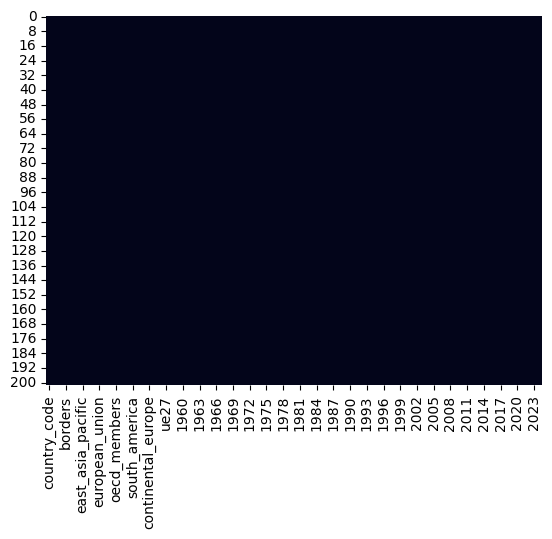

In [36]:
sns.heatmap(df.isnull(), cbar=False)

Analyse descriptives

statistiques cles

In [85]:
print(df.describe())

               1960          1961          1962          1963          1964  \
count  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02   
mean   1.447373e+07  1.466101e+07  1.491448e+07  1.522791e+07  1.554327e+07   
std    5.918181e+07  5.930097e+07  6.009885e+07  6.150736e+07  6.289591e+07   
min    2.646000e+03  2.888000e+03  3.171000e+03  3.481000e+03  3.811000e+03   
25%    2.776508e+05  2.876880e+05  2.964058e+05  3.051365e+05  3.130285e+05   
50%    2.442042e+06  2.485458e+06  2.537220e+06  2.577368e+06  2.618888e+06   
75%    7.858976e+06  8.067971e+06  8.345000e+06  8.469027e+06  8.554622e+06   
max    6.670700e+08  6.603300e+08  6.657700e+08  6.823350e+08  6.983550e+08   

               1965          1966          1967          1968          1969  \
count  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02   
mean   1.586187e+07  1.619276e+07  1.652260e+07  1.686064e+07  1.721078e+07   
std    6.432271e+07  6.591800e+07  6.746220e+07  6.

Visualisations

evolution par continent

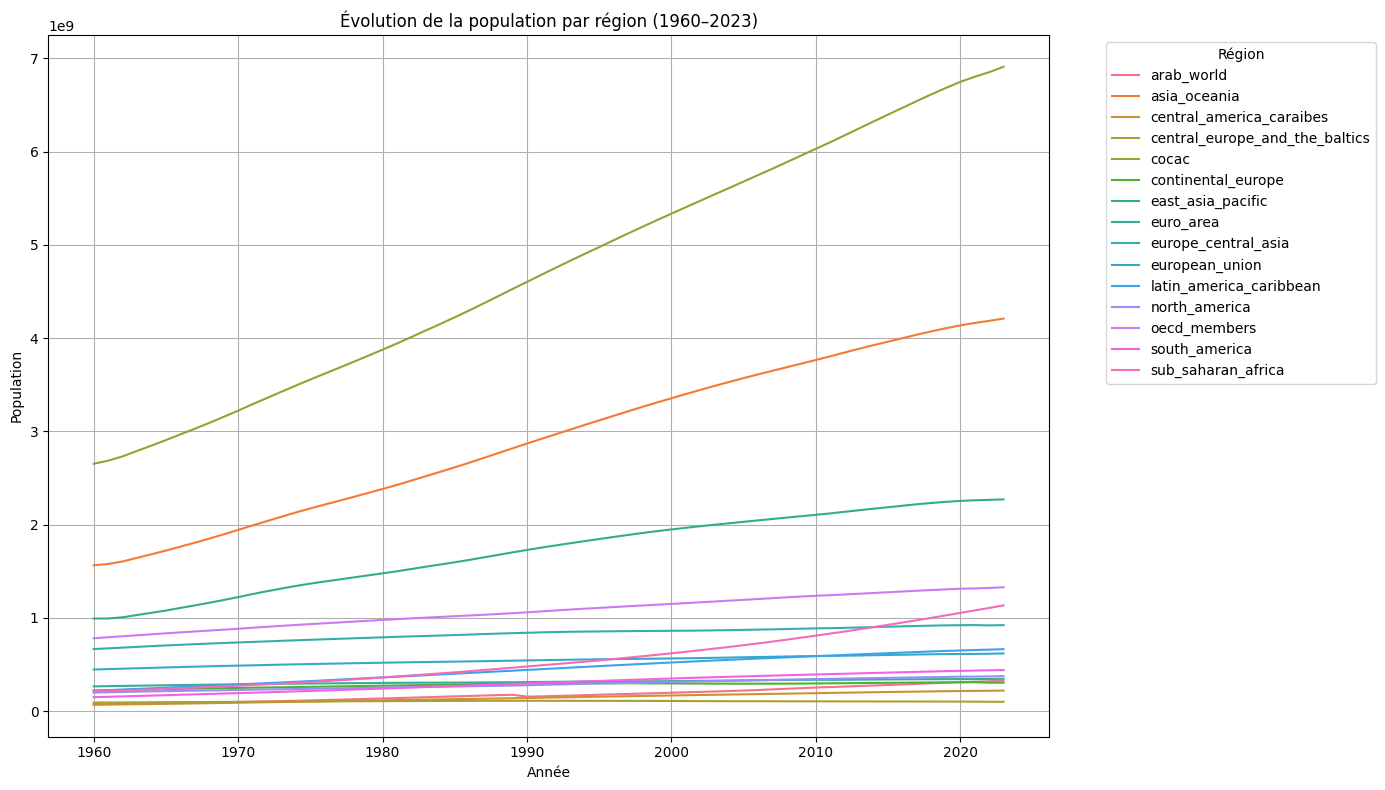

In [86]:
# Melt the DataFrame to long format (already done in the previous step, but keeping it for context)
year_columns = [str(year) for year in range(1960, 2024)]
df_long = df.melt(id_vars=['country_code', 'name_en', 'name_fr', 'borders', 'arab_world',
                         'central_europe_and_the_baltics', 'east_asia_pacific', 'euro_area',
                         'europe_central_asia', 'european_union', 'latin_america_caribbean',
                         'north_america', 'oecd_members', 'sub_saharan_africa',
                         'upper_middle_income', 'south_america', 'central_america_caraibes',
                         'cocac', 'continental_europe', 'asia_oceania', 'idh_group', 'ue27',
                         'g7', 'g20', 'has_borders'],
                value_vars=year_columns,
                var_name='year',
                value_name='population')

# Convert 'year' column to numeric (already done, but keeping it for context)
df_long['year'] = pd.to_numeric(df_long['year'])

# Define the regional columns
regional_columns = ['arab_world', 'central_europe_and_the_baltics', 'east_asia_pacific',
                    'euro_area', 'europe_central_asia', 'european_union', 'latin_america_caribbean',
                    'north_america', 'oecd_members', 'sub_saharan_africa', 'south_america',
                    'central_america_caraibes', 'cocac', 'continental_europe', 'asia_oceania']

# Prepare data for plotting by region
# We need to sum population for each region for each year.
# Since a country can belong to multiple regions (e.g., European Union and Euro Area),
# we'll create a separate entry for each region a country belongs to for a given year.
df_regions = df_long.melt(id_vars=['year', 'population', 'country_code'], value_vars=regional_columns, var_name='region', value_name='is_in_region')
df_regions = df_regions[df_regions['is_in_region'] == True]

# Group by year and region and sum the population
population_by_region = df_regions.groupby(['year', 'region'])['population'].sum().reset_index()

# Plot the population evolution by region
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='population', hue='region', data=population_by_region)
plt.title("Évolution de la population par région (1960–2023)")
plt.xlabel("Année")
plt.ylabel("Population")
plt.grid(True)
plt.legend(title='Région', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

evolution globale de la population mondiale

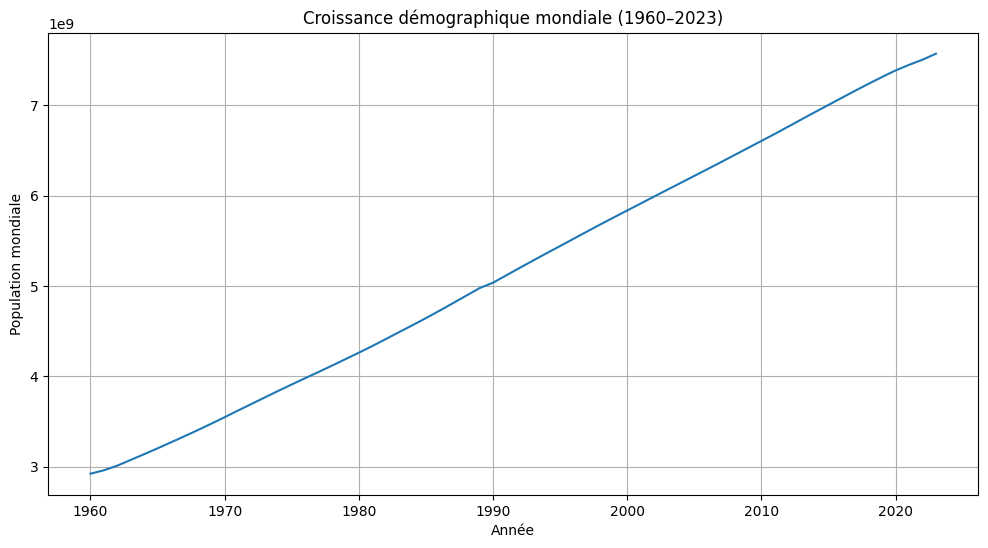

In [87]:
# Group by year and sum the population to get global population per year
global_population = df_long.groupby('year')['population'].sum().reset_index()

# Plot the global population growth
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', data=global_population)
plt.title("Croissance démographique mondiale (1960–2023)")
plt.xlabel("Année")
plt.ylabel("Population mondiale")
plt.grid(True)
plt.show()

Repartition par region ou continent

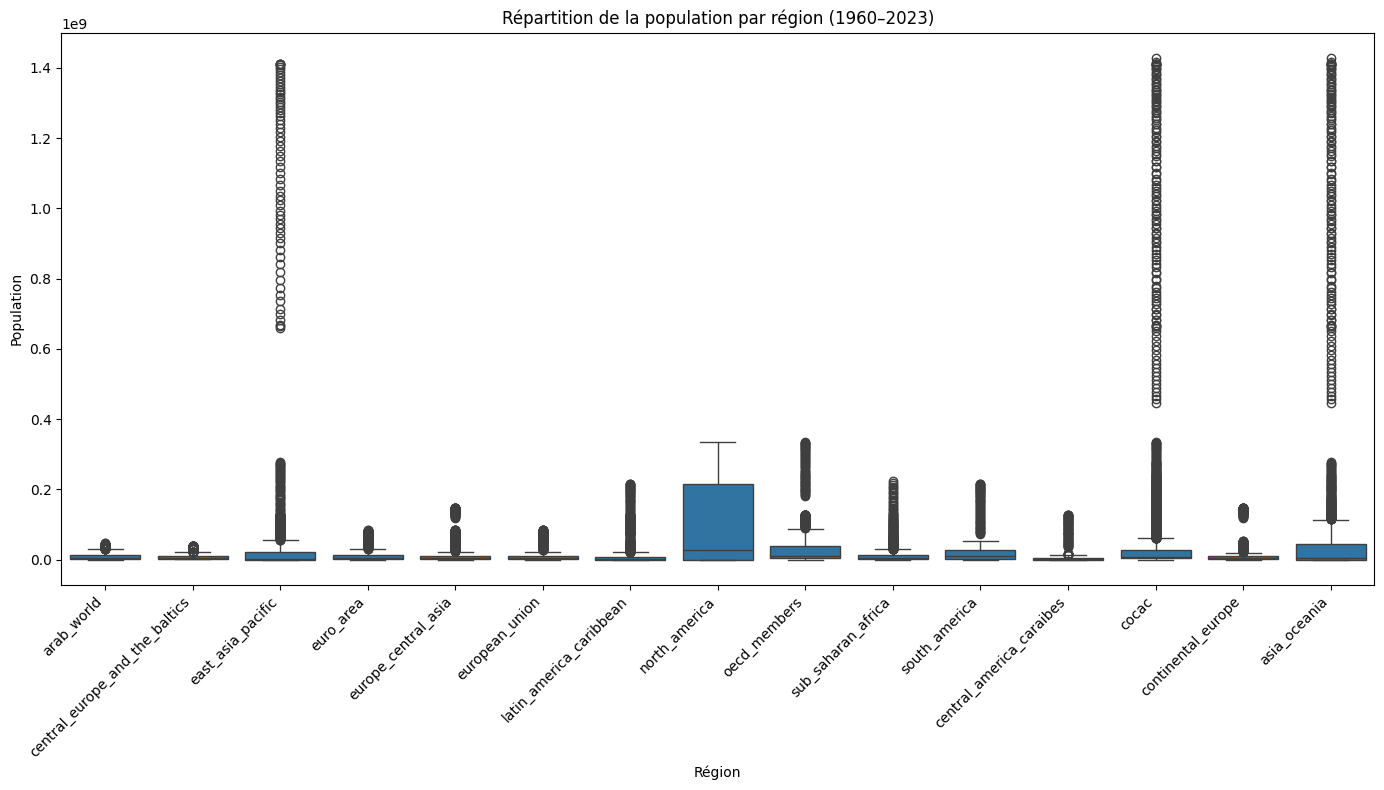

In [88]:
# Plot the distribution of population by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='population', data=df_regions)
plt.title("Répartition de la population par région (1960–2023)")
plt.xlabel("Région")
plt.ylabel("Population")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

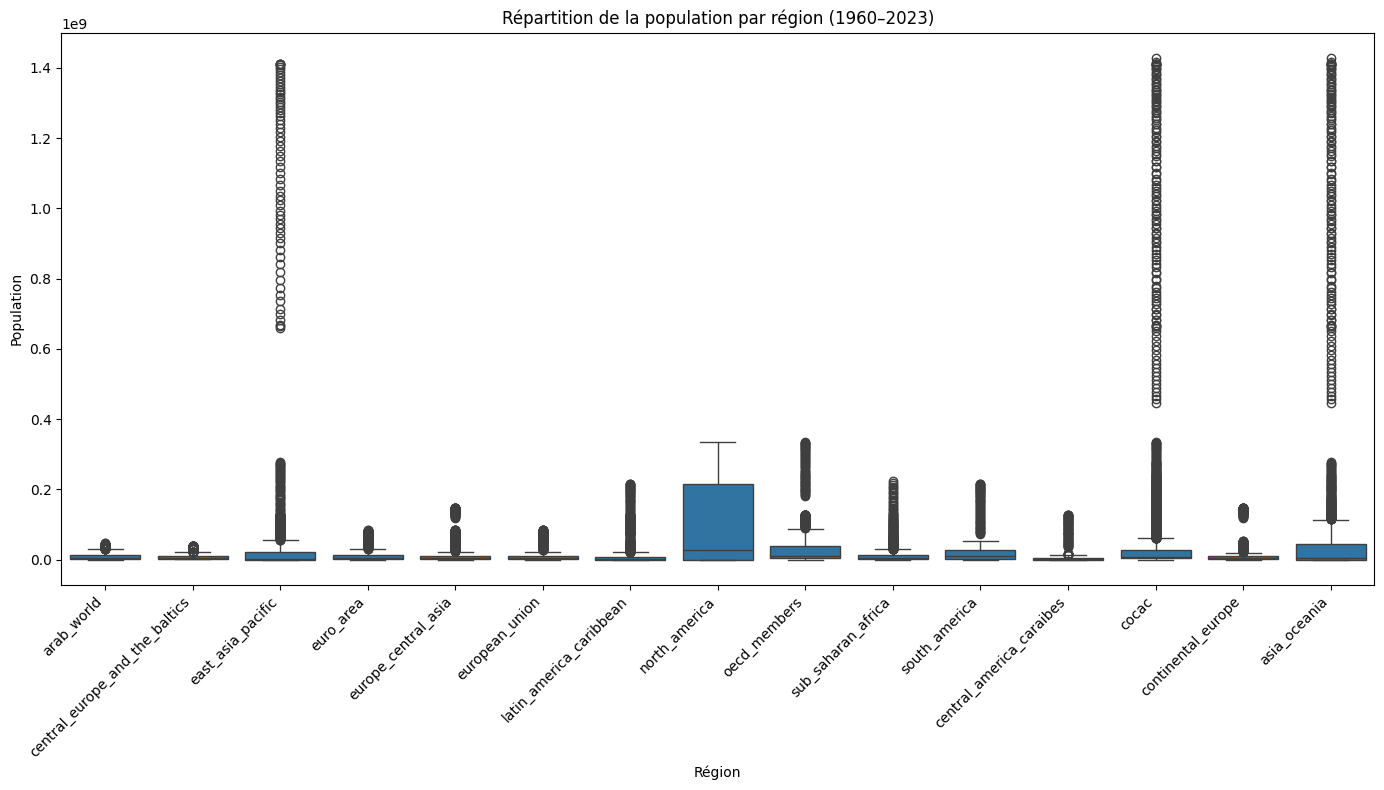

In [48]:
# Plot the distribution of population by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='population', data=df_regions)
plt.title("Répartition de la population par région (1960–2023)")
plt.xlabel("Région")
plt.ylabel("Population")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

les dix pays les plus peupler

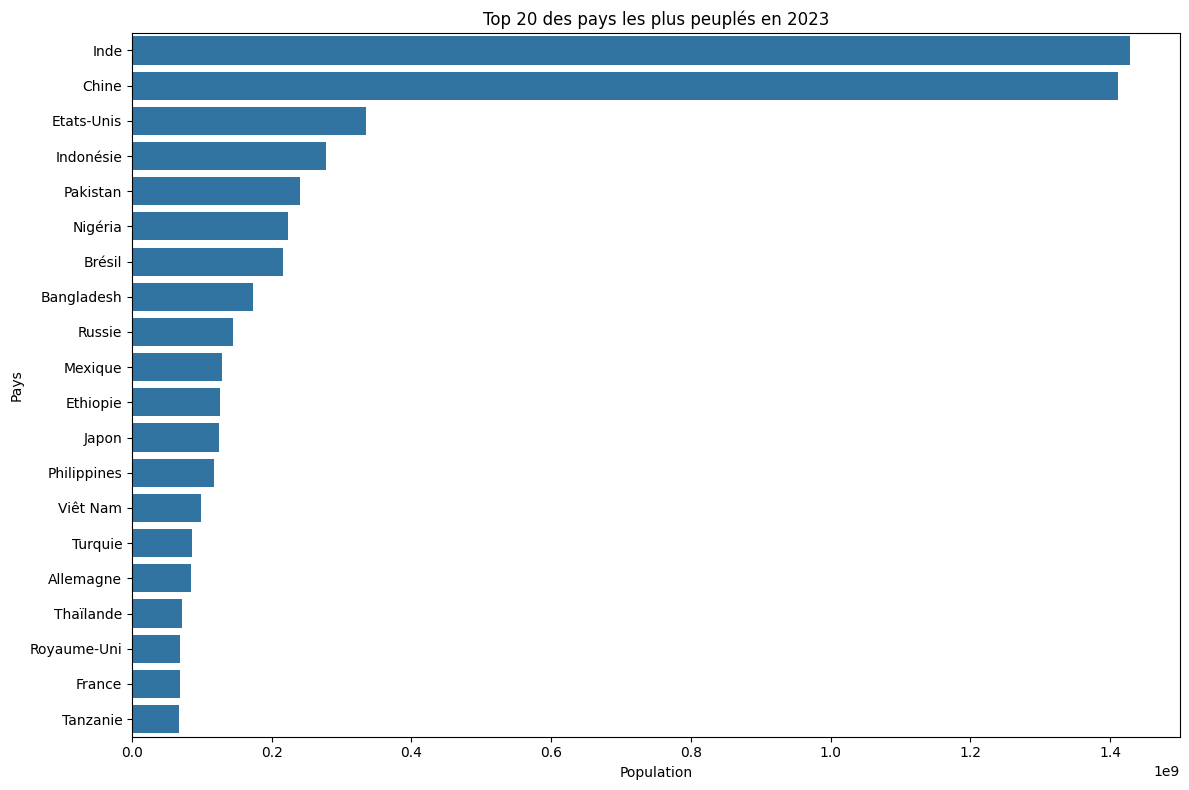

In [89]:
# Filter for the year 2023 and get the top 20 most populous countries
top_20_2023 = df_long[df_long['year'] == 2023].sort_values('population', ascending=False).head(20)

# Plot the top 20 most populous countries in 2023
plt.figure(figsize=(12, 8))
sns.barplot(x='population', y='name_fr', data=top_20_2023)
plt.title("Top 20 des pays les plus peuplés en 2023")
plt.xlabel("Population")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

top 10 pays les moins peuples

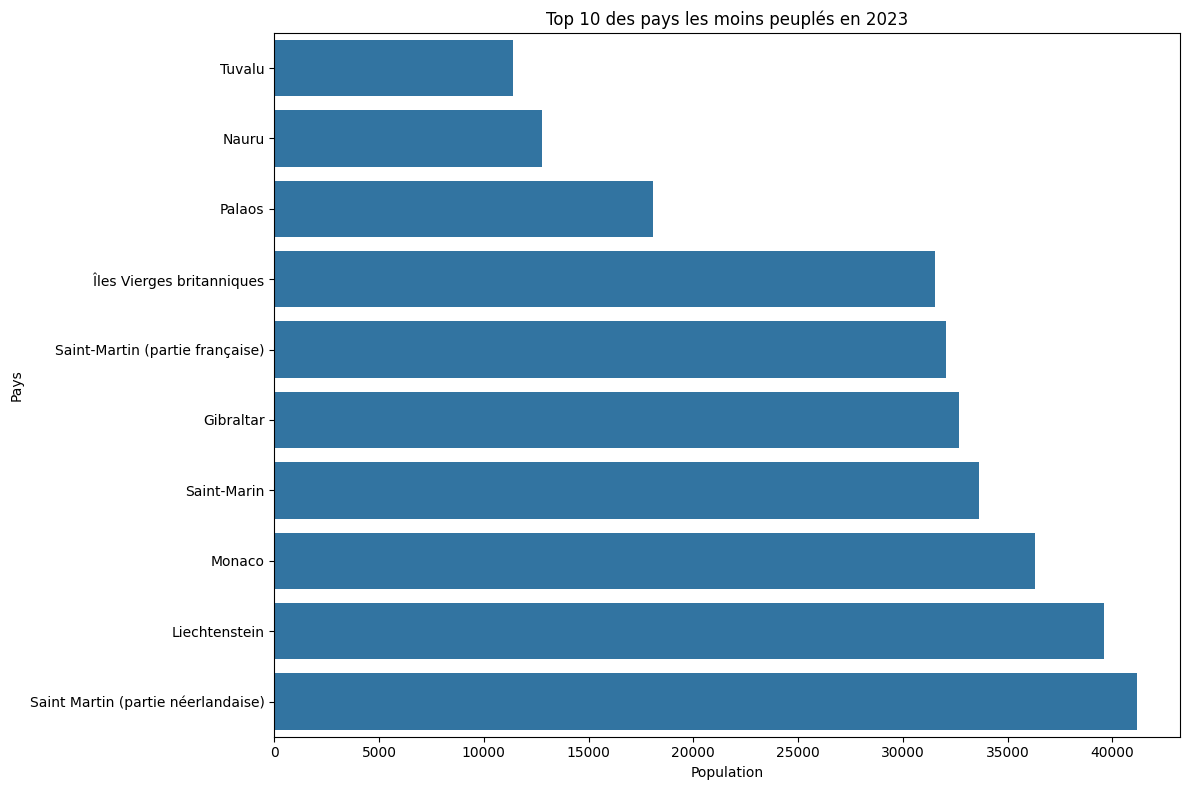

In [90]:
# Filter for the year 2023 and get the bottom 10 least populous countries
bottom_10_2023 = df_long[df_long['year'] == 2023].sort_values('population', ascending=True).head(10)

# Plot the bottom 10 least populous countries in 2023
plt.figure(figsize=(12, 8))
sns.barplot(x='population', y='name_fr', data=bottom_10_2023)
plt.title("Top 10 des pays les moins peuplés en 2023")
plt.xlabel("Population")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

les pays a croissances rapides


## Calculer la variation de population annuelle

### Subtask:
Calculer la différence de population entre chaque année consécutive pour chaque pays.


**Reasoning**:
Calculate the annual population change for each country by iterating through unique countries, sorting their data by year, and then computing the difference in population between consecutive years using the `diff()` method.



In [91]:
# Calculate the annual population change for each country
df_long['annual_population_change'] = df_long.groupby('country_code')['population'].diff()

# Fill the first year's change for each country with 0, as there's no previous year
df_long['annual_population_change'] = df_long['annual_population_change'].fillna(0)

print(df_long.head())

  country_code                           name_en   name_fr  \
0          BEL                           Belgium  Belgique   
1          BOL  Bolivia (Plurinational State of)   Bolivie   
2          COM                           Comoros   Comores   
3          CHE                       Switzerland    Suisse   
4          GHA                             Ghana     Ghana   

               borders  arab_world  central_europe_and_the_baltics  \
0      FRA,DEU,LUX,NLD       False                           False   
1  ARG,BRA,CHL,PRY,PER       False                           False   
2          MDG,MOZ,TZA        True                           False   
3  AUT,FRA,ITA,LIE,DEU       False                           False   
4          BFA,CIV,TGO       False                           False   

   east_asia_pacific  euro_area  europe_central_asia  european_union  ...  \
0              False       True                 True            True  ...   
1              False      False                False

## Mesurer la stabilité de la croissance

### Subtask:
Calculer une mesure de la variabilité (comme l'écart-type) de la variation annuelle de la population pour chaque pays.


**Reasoning**:
Calculate the standard deviation of the annual population change for each country to measure the stability of population growth.



/tmp/ipython-input-92-3639935528.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_3, x='population_change_std_dev', y='country_code', inner='stick', palette='Dark2')


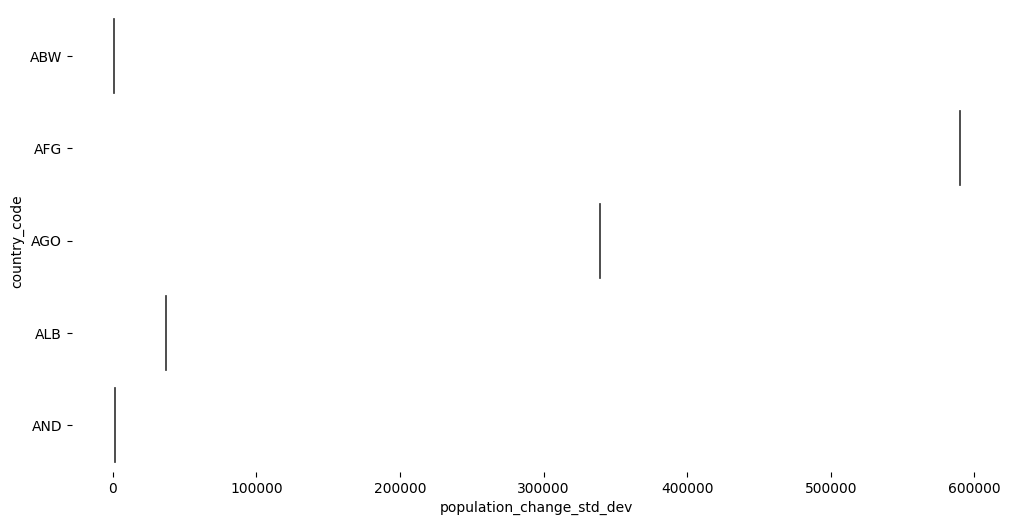

In [92]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['country_code'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='population_change_std_dev', y='country_code', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

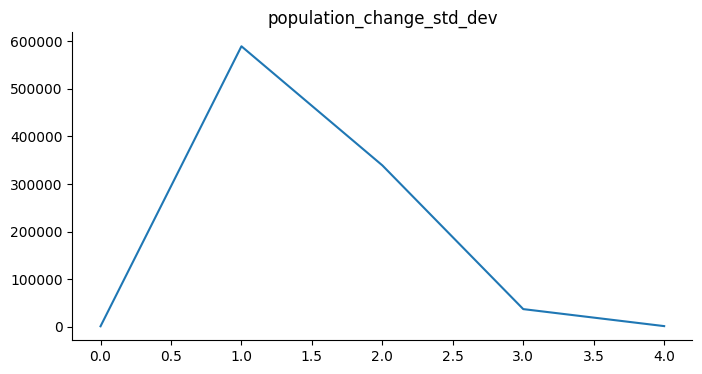

In [93]:
from matplotlib import pyplot as plt
_df_2['population_change_std_dev'].plot(kind='line', figsize=(8, 4), title='population_change_std_dev')
plt.gca().spines[['top', 'right']].set_visible(False)

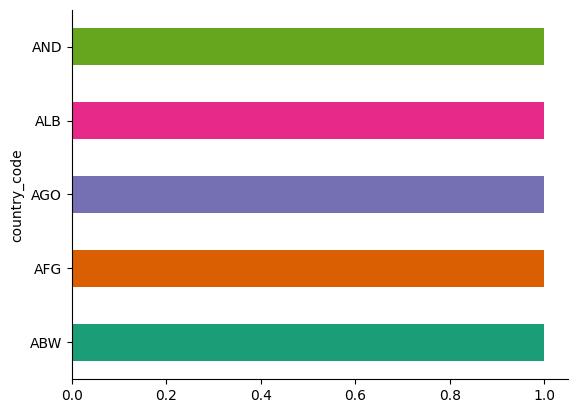

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('country_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

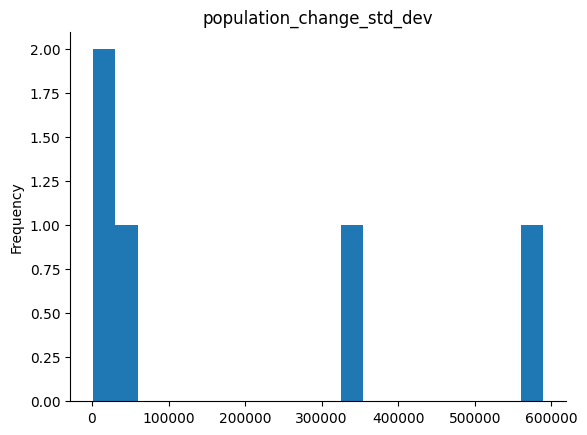

In [95]:
from matplotlib import pyplot as plt
_df_0['population_change_std_dev'].plot(kind='hist', bins=20, title='population_change_std_dev')
plt.gca().spines[['top', 'right',]].set_visible(False)

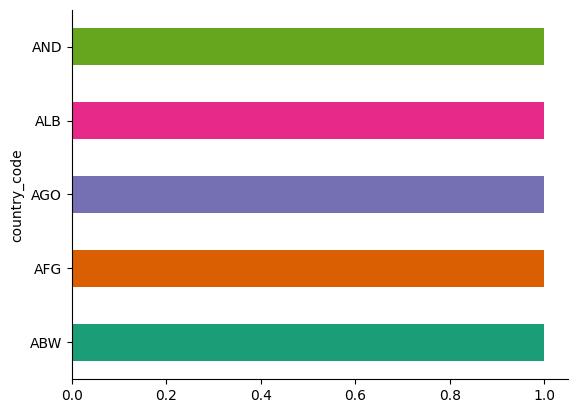

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('country_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

extraction des donnees de la population du BENIN

In [97]:
# Filter the DataFrame for Benin's population data from 1960 to 2023
benin_population_data = df_long[(df_long['name_fr'] == 'Bénin') &
                                (df_long['year'] >= 1960) &
                                (df_long['year'] <= 2023)]

# Display the filtered data
display(benin_population_data)

,country_code,name_en,name_fr,borders,arab_world,central_europe_and_the_baltics,east_asia_pacific,euro_area,europe_central_asia,european_union,...,continental_europe,asia_oceania,idh_group,ue27,g7,g20,has_borders,year,population,annual_population_change
86,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,1960,2512284.0,0.0
288,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,1961,2551216.0,38932.0
490,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,1962,2593302.0,42086.0
692,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,1963,2638082.0,44780.0
894,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,1964,2685619.0,47537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,2019,12290444.0,349761.0
12206,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,2020,12643123.0,352679.0
12408,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,2021,12996895.0,353772.0
12610,BEN,Benin,Bénin,"BFA,NER,NGA,TGO",False,False,False,False,False,False,...,False,False,Indice de développement humain faible,False,False,False,1,2022,13352864.0,355969.0


exporter les donnees de population  du benin

In [101]:
# Select only the relevant columns for Benin's population data
benin_population_subset = benin_population_data[['country_code', 'name_en', 'name_fr', 'year', 'population', 'annual_population_change']]

# Save the filtered data for Benin to a CSV file
benin_population_subset.to_csv('benin_population_1960_2023_filtered.csv', encoding='utf-8-sig', index=False, sep=';')

print("Données filtrées de population du Bénin exportées vers 'benin_population_1960_2023_filtered.csv'")

Données filtrées de population du Bénin exportées vers 'benin_population_1960_2023_filtered.csv'


# Task
Generate separate CSV files for each region present in the dataset. Each file should contain the country code, English and French country names, year, population, and annual population change for all countries belonging to that specific region.

## Identify regional columns

### Subtask:
Define the list of columns that represent different regions.


**Reasoning**:
Define the list of regional columns as specified in the instructions.



In [103]:
# Define the list of regional columns
regional_columns = ['arab_world', 'central_europe_and_the_baltics', 'east_asia_pacific',
                    'euro_area', 'europe_central_asia', 'european_union', 'latin_america_caribbean',
                    'north_america', 'oecd_members', 'sub_saharan_africa', 'south_america',
                    'central_america_caraibes', 'cocac', 'continental_europe', 'asia_oceania']

print(regional_columns)

['arab_world', 'central_europe_and_the_baltics', 'east_asia_pacific', 'euro_area', 'europe_central_asia', 'european_union', 'latin_america_caribbean', 'north_america', 'oecd_members', 'sub_saharan_africa', 'south_america', 'central_america_caraibes', 'cocac', 'continental_europe', 'asia_oceania']


**Reasoning**:
The regional columns have been defined. Now, I will iterate through each region, filter the dataframe for countries belonging to that region, and save the relevant columns to a separate CSV file.



In [104]:
# Iterate through each region
for region in regional_columns:
    # Filter the DataFrame for countries belonging to the current region
    df_region_filtered = df_long[df_long[region] == True]

    # Select the relevant columns for the output CSV
    df_region_subset = df_region_filtered[['country_code', 'name_en', 'name_fr', 'year', 'population', 'annual_population_change']]

    # Define the output filename based on the region name
    output_filename = f'{region}_population_1960_2023.csv'

    # Save the filtered data to a CSV file
    df_region_subset.to_csv(output_filename, encoding='utf-8-sig', index=False, sep=';')

    print(f"Données pour la région '{region}' exportées vers '{output_filename}'")

Données pour la région 'arab_world' exportées vers 'arab_world_population_1960_2023.csv'
Données pour la région 'central_europe_and_the_baltics' exportées vers 'central_europe_and_the_baltics_population_1960_2023.csv'
Données pour la région 'east_asia_pacific' exportées vers 'east_asia_pacific_population_1960_2023.csv'
Données pour la région 'euro_area' exportées vers 'euro_area_population_1960_2023.csv'
Données pour la région 'europe_central_asia' exportées vers 'europe_central_asia_population_1960_2023.csv'
Données pour la région 'european_union' exportées vers 'european_union_population_1960_2023.csv'
Données pour la région 'latin_america_caribbean' exportées vers 'latin_america_caribbean_population_1960_2023.csv'
Données pour la région 'north_america' exportées vers 'north_america_population_1960_2023.csv'
Données pour la région 'oecd_members' exportées vers 'oecd_members_population_1960_2023.csv'
Données pour la région 'sub_saharan_africa' exportées vers 'sub_saharan_africa_popula